# Final Project Template 

# **Final Presentation**

By Shane Chambers & Guillermo Veron

## **1) Get your data**
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## **The cost of health insurance is determined by a certain set of factors**

 -  Age

 - Sex

 - Number of Children

 - Smoking/Tobacco Use

 - BMI

 - Where One Lives

## **2) Provide a link to your data**
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

*Data used in this project can be found [here](https://www.kaggle.com/mirichoi0218/insurance/version/1). This is a ***Medical Cost Personal Datasets*** dataset designed for machine learning exploration from Kaggle.*

## **3) Import your data**
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [52]:
import pandas as pd
import numpy as np

insurance = pd.read_csv('insurance.csv')

## **4) Show me the head of your data.**

*The head of these data can be seen below:*

In [53]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*Data used in this project can be found [here](https://www.kaggle.com/mirichoi0218/insurance/version/1). This is a ***Medical Cost Personal Datasets*** dataset designed for machine learning exploration from Kaggle.*

## **5) Show me the shape of your data**

*This dataset contains ~1400 observations, each with 7 dimensions:*

In [54]:
insurance.shape

(1338, 7)

## **6) Show me the proportion of missing observations for each column of your data**

*Shown below, these data have no missing values, meaning there is no need to impute missing values.*

In [55]:
# Assertion statement to ensure that the sum of all NA's in the df equal 0 (i.e. no NA values)
assert insurance.isna().sum().sum() == 0

insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **7) Give me a problem statement.**
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

## **Problem Statement**

Can we predict the cost of insurance for each individual?

*To best explore these data, we will give two "problem statements":*

1. ***Regression:*** *Can we predict the cost of insurance for each individual?*

2. ***Clustering:*** *Can we identify underlying groups in the data, possible those that can't be explained by the categorical variables given?*

## **8) What is your _y_-variable?**
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

*Given our multiple problem statements, we will in turn have multiple outcome variables. These variables are listed below and correcspond with the problem statements above:*

1. ***Regression:*** `charges`

2. ***Clustering:*** `?`

## **9) Data Exploration**

*Here, we will explore the distribution of our data and the relationships between variables. These data have 3 continuous and 4 categorical variables, as we will see below. We will preview the data again below for convenience and explore each variable individually, and then continue by looking at the relationships between variables before moving on to addressing our problem statements.*

In [56]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ***Age distribution***

*Below we can see that age has a relatively flat distribution, with a slight skew due to a larger proportion of individuals in their teens/early 20's.*

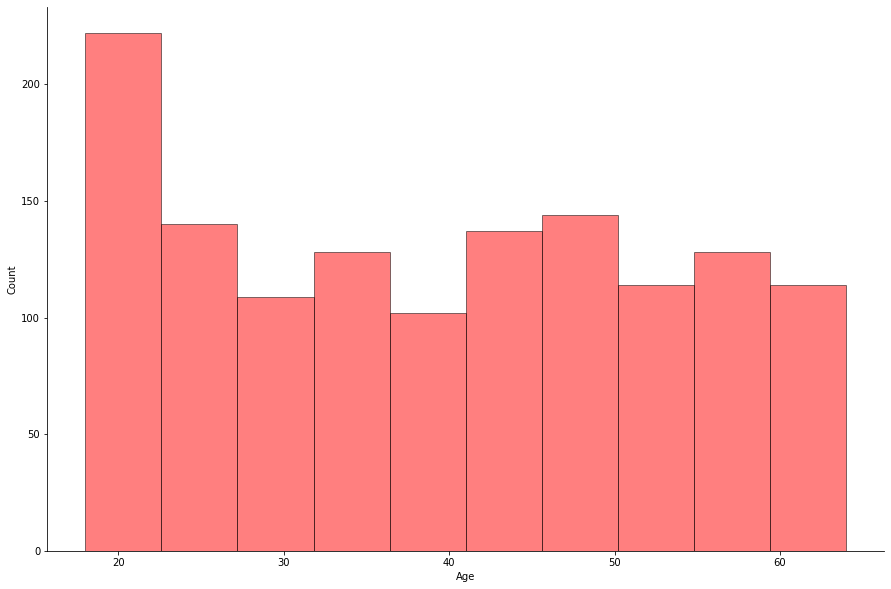

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
age_dist = fig.add_subplot()

age_dist.hist(insurance['age'], color="red", alpha=.5, edgecolor='black')
age_dist.set_xlabel('Age')
age_dist.set_ylabel('Count')
#age_dist.set_ylim((0,800))
age_dist.spines['right'].set_visible(False)
age_dist.spines['top'].set_visible(False)

## ***Sex distribution***

*Here we can visualize the distribution of sex within the dataframe. We can see that the amount of males and females are nearly identical:*

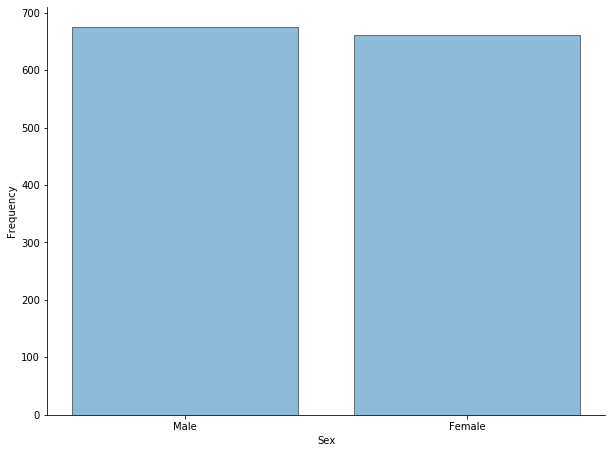

In [58]:
# make a function to get the frequencies of of an observation within a column
def get_freq(col, obs):
    """
    Returns the number of observation obs in column col from the insurance dataframe
    """
    return insurance[insurance[col] == obs][col].count()

# Get the frequencies of male and female observations
male_count = get_freq('sex', 'male')
female_count = get_freq('sex', 'female')

# assert that the sum of these two variables equals the total number of observations

assert (male_count + female_count) == insurance.shape[0]

plt.close()
fig = plt.figure(figsize=(10, 7.5))
sex_dist = fig.add_subplot()

sex_dist.bar(['Male', 'Female'], [male_count, female_count], alpha = .5, edgecolor='black')
sex_dist.set_xlabel('Sex')
sex_dist.set_ylabel('Frequency')
sex_dist.spines['right'].set_visible(False)
sex_dist.spines['top'].set_visible(False)

## ***BMI distribution***

*Here we visualize BMI by sex, given the biological differences between sexes.*

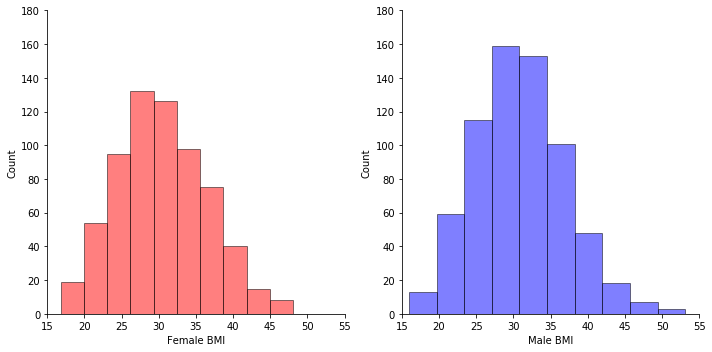

In [59]:
plt.close()
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(insurance[insurance['sex'] == 'female']['bmi'], color="red", alpha=0.5, edgecolor='black', bins = 10)
ax1.set_xlabel('Female BMI')
ax1.set_ylabel('Count')
ax1.set_ylim((0,180))
ax1.set_xlim((15,55))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


ax2.hist(insurance[insurance['sex'] == 'male']['bmi'], color="blue", alpha=0.5, edgecolor='black', bins = 10)
ax2.set_xlabel('Male BMI')
ax2.set_ylabel('Count')
ax2.set_ylim((0,180))
ax2.set_xlim((15,55))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

## ***Number of Children Distribution***

*Below we visualize the distribution of how many children individuals from these data have:*

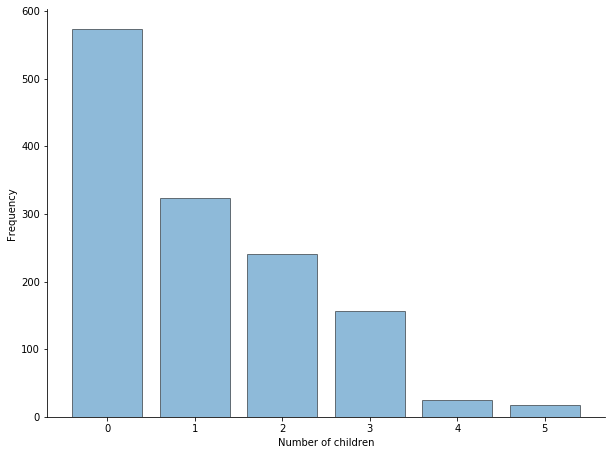

In [60]:
# instantiate a list to be used in the for loop
child_freq_list = []

# make a for loop to use the get_freq function defined earlier to get the frequency of each unique observation in the 'children' column
for i in range(0, insurance['children'].max() + 1):
    count = get_freq('children', i)
    child_freq_list.append(count)

# Assert that the sum of all child counts previously obtained is equal to the amount of rows in the dataframe
assert sum(child_freq_list) == insurance.shape[0]

# Visualize
plt.close()
fig = plt.figure(figsize=(10, 7.5))
sex_dist = fig.add_subplot()

sex_dist.bar(np.arange(0, 6), child_freq_list, alpha = .5, edgecolor='black')
sex_dist.set_xlabel('Number of children')
sex_dist.set_ylabel('Frequency')
sex_dist.spines['right'].set_visible(False)
sex_dist.spines['top'].set_visible(False)

## ***Smoking Distribution***

*Here we visualize the amount of smokers vs. nonsmokers, noting that there are far more nonsmokers in these data*

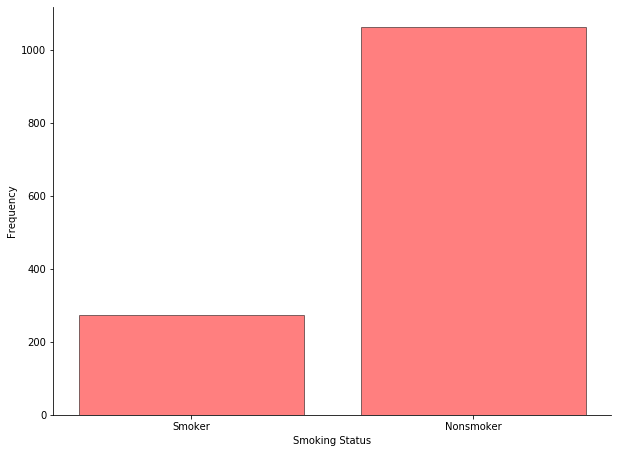

In [61]:
# Get the frequencies of smoking and nonsmoking observations
smoke_count = get_freq('smoker', 'yes')
no_smoke_count = get_freq('smoker', 'no')

# assert that the sum of these two variables equals the total number of observations
assert (smoke_count + no_smoke_count) == insurance.shape[0]

# Visualize
plt.close()
fig = plt.figure(figsize=(10, 7.5))
sex_dist = fig.add_subplot()

sex_dist.bar(['Smoker', 'Nonsmoker'], [smoke_count, no_smoke_count], color = 'red', alpha = .5, edgecolor='black')
sex_dist.set_xlabel('Smoking Status')
sex_dist.set_ylabel('Frequency')
sex_dist.spines['right'].set_visible(False)
sex_dist.spines['top'].set_visible(False)

## ***Region Distribution***

*Here we visualize the frequency of the 'region' column in the dataframe:*

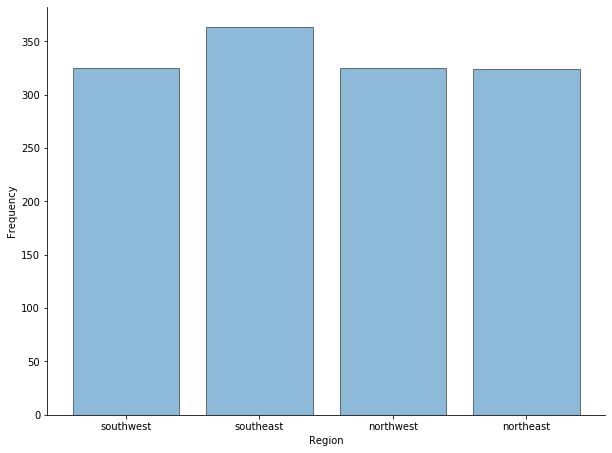

In [62]:
# instantiate a list to be used in the for loop
region_freq_list = []

# make a for loop to use the get_freq function defined earlier to get the frequency of each unique observation in the 'region' column
unique_regions = insurance['region'].unique()
for i in unique_regions:
    count = get_freq('region', i)
    region_freq_list.append(count)

# Assert that the sum of all region counts previously obtained is equal to the amount of rows in the dataframe
assert sum(region_freq_list) == insurance.shape[0]

# Visualize
plt.close()
fig = plt.figure(figsize=(10, 7.5))
sex_dist = fig.add_subplot()

sex_dist.bar(unique_regions, region_freq_list, alpha = .5, edgecolor='black')
sex_dist.set_xlabel('Region')
sex_dist.set_ylabel('Frequency')
sex_dist.spines['right'].set_visible(False)
sex_dist.spines['top'].set_visible(False)

## ***Charges Distribution***

*Finally, we visualize the distribution of the insurance charges:*

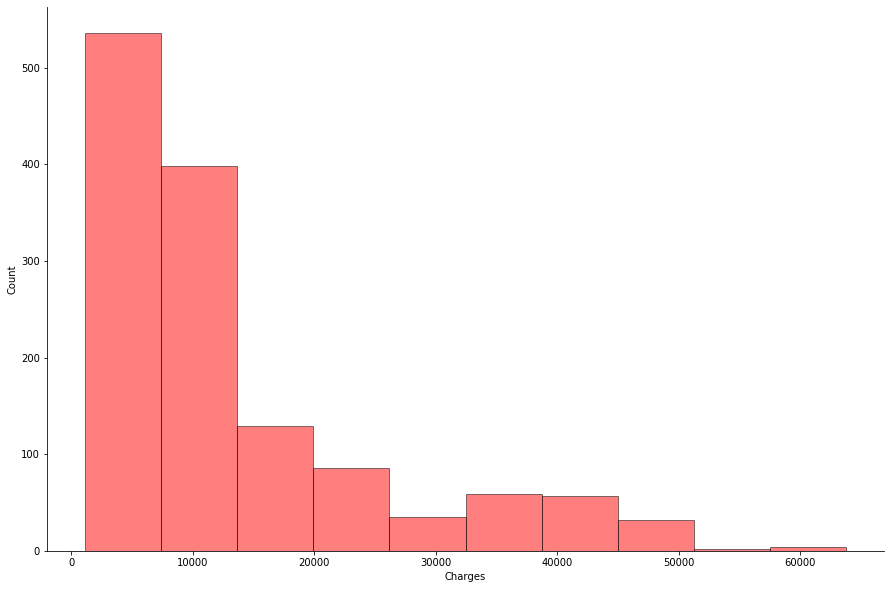

In [63]:
# Visualize
plt.close()
fig = plt.figure(figsize=(15, 10))
age_dist = fig.add_subplot()

age_dist.hist(insurance['charges'], color="red", alpha=.5, edgecolor='black')
age_dist.set_xlabel('Charges')
age_dist.set_ylabel('Count')
age_dist.spines['right'].set_visible(False)
age_dist.spines['top'].set_visible(False)

## **Relationships Between Variables**

*Now we can explore the relationships between variables using seaborn's `pairplot`:*

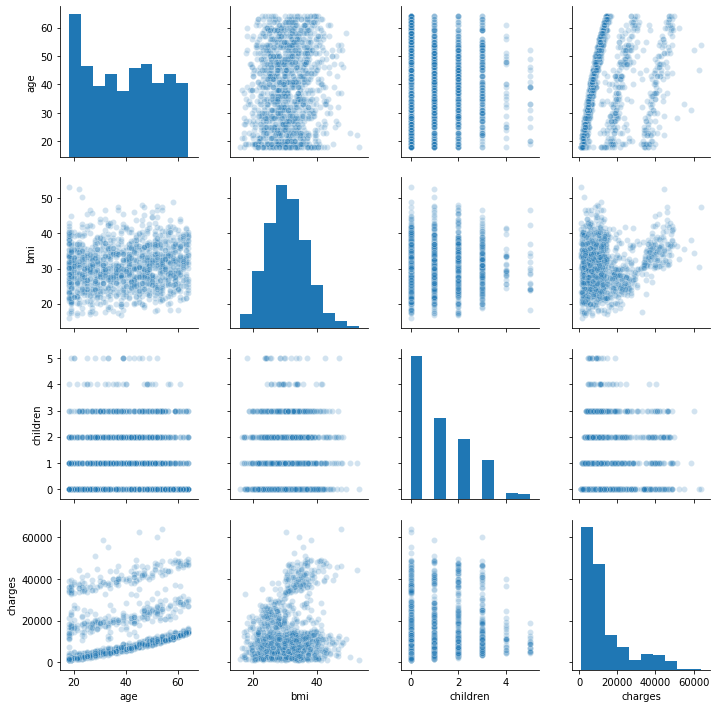

In [64]:
import seaborn as sns

sns.pairplot(insurance, plot_kws= {'alpha' : .2})

*We begin to see some interesting trends, namely three distinct groups that appear in the charges vs. age plot. We can try to investigate this by coloring the plots by some of our categorical variables:*



### ***Pairplot Colored by Smoking Status:***

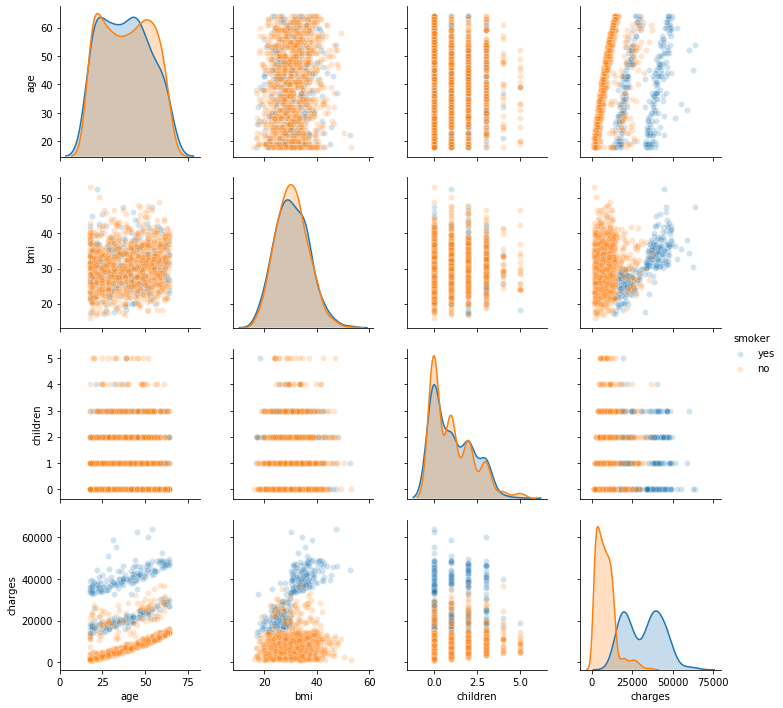

In [65]:
sns.pairplot(insurance, hue = 'smoker', plot_kws= {'alpha' : .2})

*Here we begin to see the age vs. charges groups separate, and we see a new trend in the relationship between charges and bmi.*



### ***Pairplot Colored by Sex:***

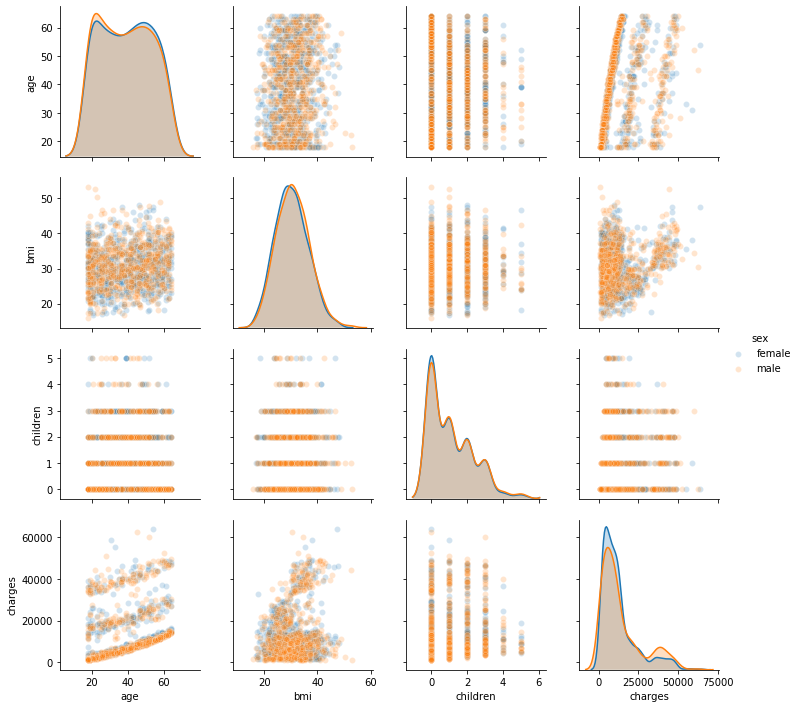

In [66]:
sns.pairplot(insurance, hue = 'sex', plot_kws= {'alpha' : .2})

*Coloring by sex doesn't elucidate any trends, so finally we can color by region, which also doesn't show anything revealing:*



### ***Pairplot Colored by Region:***

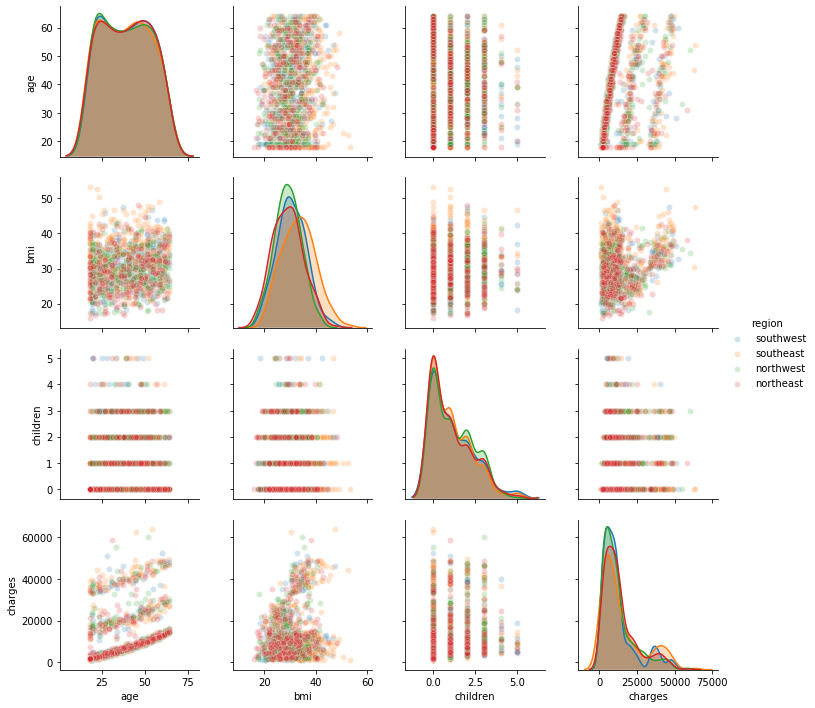

In [67]:
sns.pairplot(insurance, hue = 'region', plot_kws= {'alpha' : .2})

## **Predict Charges With Regression**

*To predict this variable, we have multiple options. These being Linear Regression, Nearest Neighbors, Decision Tree, Random Forest and Gradient Boosting. We will use both the K-Nearest Neighbors, linear regression and a decision tree to achieve our goal of predicting the charges variable. We can compare these models using mean error, and will also look at whether normalization of our data improves the predictive power of the models.*

*First, we need to process the data by encoding the categorical variables and normalizing the continuous variables. Normalization of these continuous variables will allow them to all be on a similar scale, preventing one feature from dominating the ourput of the model.*

*Next, we will split our data into a training set and testing set, which allows us to train the model without allowing it to know the data by heart, preventing overfitting.*

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# isolate the features that will be used for prediction
feature_data = insurance.copy().loc[:, 'age':'region']
# isolate the target variable 'charges'
target_data = insurance.copy()['charges']

# Process the data by encoding categorical variables and normalizing columns
processed_feature_data = normalize(pd.get_dummies(feature_data))


# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(processed_feature_data, target_data, test_size = .33, random_state = 1000)

### ***KNN modeling-tuning hyperparameters:***

*Now, we will tune the `Neighbors` parameter to find the optimal number of neighbors to model with. Here we create a for loop to eventually graph the MSE vs. # of neighbors.*

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Write a for loop to iterate through all possible # of neighbors and stor MSE for each iteration
num_of_neighbors = []
knn_MSE = []

for i in range(1, X_test.shape[0]):
    nnr = KNeighborsRegressor(n_neighbors=i)
    nnr.fit(X_train, y_train)
    knn_preds = nnr.predict(X_test)
    MSE = mean_squared_error(y_test, knn_preds)
    
    num_of_neighbors.append(i)
    knn_MSE.append(MSE)

*Next, we will store the results of our loop as a dataframe, and extract the KNN that resulted in the lowest MSE (this is the optimal # of neighbors)*

In [70]:
# Store the # of neighbors and corresponding MSE as a pandas dataframe
model_opt = pd.DataFrame({
    'num_of_neighbors' : num_of_neighbors,
    'MSE' : knn_MSE
})

# Find the # of neighbors corresponding with the lowest MSE
knn_min_X_coord = model_opt[model_opt['MSE'] == model_opt['MSE'].min()].iloc[0]['num_of_neighbors']
# Find the lowest MSE for plotting purposes
knn_min_Y_coord = model_opt[model_opt['MSE'] == model_opt['MSE'].min()]['MSE']

*Finally we can plot these results, labelling the valley that represents optimal KNN*

Text(7.0, 3    7.317143e+07
Name: MSE, dtype: float64, 'Optimal Number of Neighbors: 4.0')

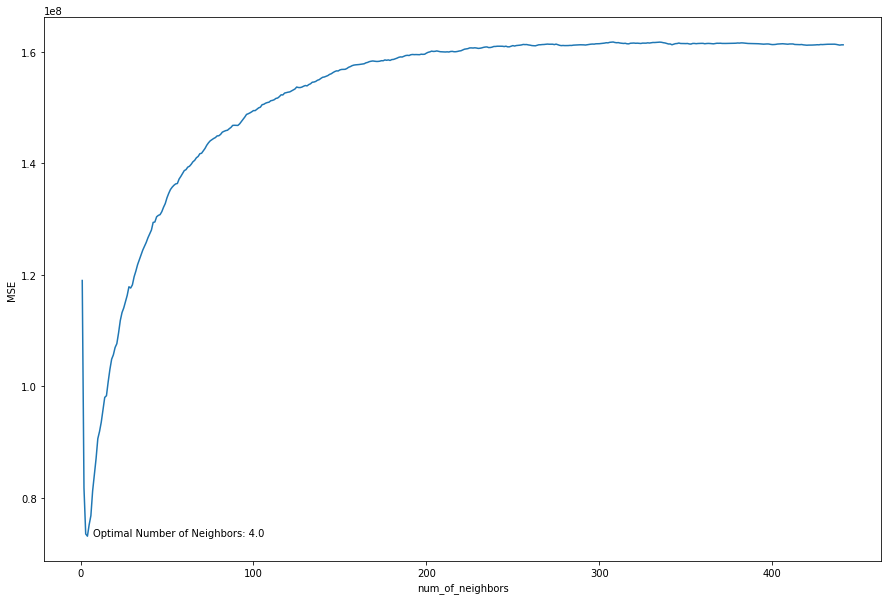

In [71]:
# Visualize and label the point of optimal nearest neighbors
fig = plt.figure(figsize=(15, 10))
sns.lineplot(x = model_opt['num_of_neighbors'],
               y = model_opt['MSE'])

plt.text(knn_min_X_coord + 3, knn_min_Y_coord, 'Optimal Number of Neighbors: ' + str(knn_min_X_coord))

### ***KNN modeling-Making Predictions on test data:***

*Below we will train our model on the testing data using the optimized hyperparameter of N = 4 and make predictions, comparing our predicted values to the actual values:*

In [72]:
# Instantiate, fit, predict
nnr = KNeighborsRegressor(n_neighbors=int(knn_min_X_coord))
nnr.fit(X_train, y_train)
y_pred_nn = nnr.predict(X_test)

*Now we can plot our predicted y variable and the actual Y-variable against an arbitrary X variable. For our X variable we chose to use age, seeing as we had a curious relationship between these two variables in the pairplot:*

Text(0.4, 50000, 'ME: 8554.0')

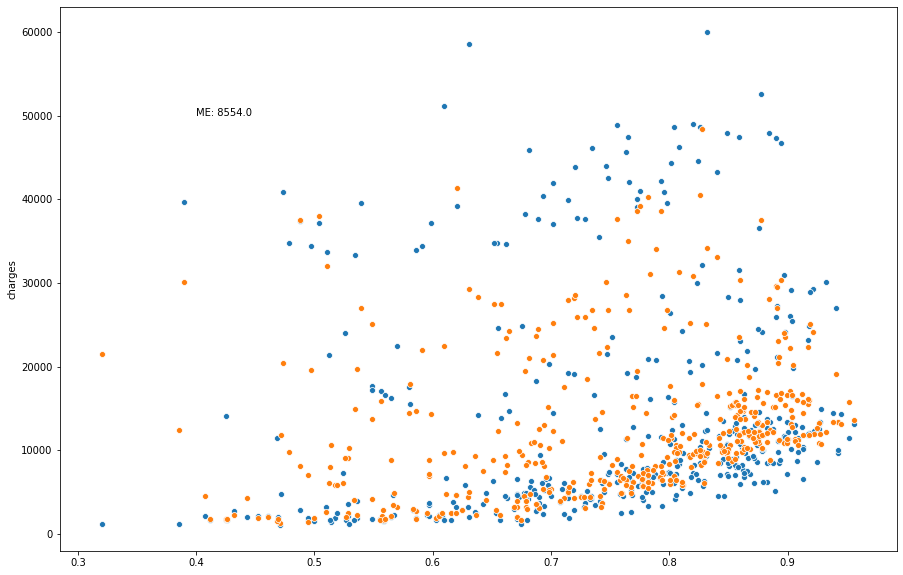

In [73]:
# Get mean error
knn_norm_me = np.sqrt(mean_squared_error(y_test, y_pred_nn))

# Visualize
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(X_test[..., 0], y_test)
sns.scatterplot(X_test[..., 0], y_pred_nn)
plt.text(.4, 50000, 'ME: ' + str(round(knn_norm_me)))

*As we can see, our model does a good job predicting charges in the bottom 'group', however has trouble deciding the y variable in the two groups above it with higher charges. Now, let's try this same approach but with the unnormalized data:*



### ***KNN with Unnormalized Data***

*Below we make a new train test split with unnormalized data:*

In [74]:
processed_feature_data_unnorm = pd.get_dummies(feature_data)
X_unnorm_train, X_unnorm_test, y_unnorm_train, y_unnorm_test = train_test_split(processed_feature_data_unnorm, target_data, test_size = .33, random_state = 1000)

*Below we take all the same steps as before with KNN,but instead using this unnormalized data:*

Text(20, 50000, 'ME: 11086.0')

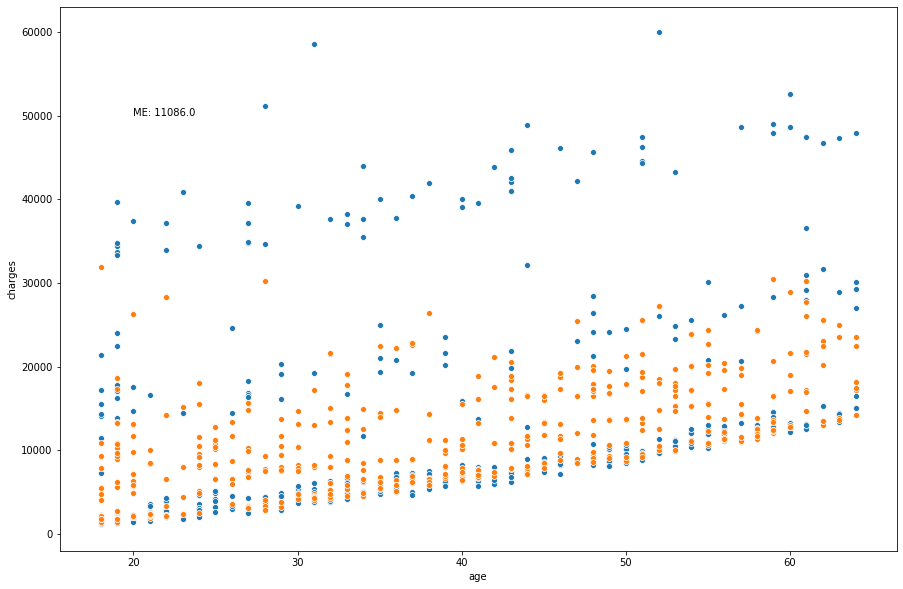

In [75]:
# Write a for loop to iterate through all possible # of neighbors and stor MSE for each iteration
num_of_neighbors_unnorm = []
knn_MSE_unnorm = []

for i in range(1, X_unnorm_test.shape[0]):
    nnr = KNeighborsRegressor(n_neighbors=i)
    nnr.fit(X_unnorm_train, y_unnorm_train)
    knn_preds = nnr.predict(X_unnorm_test)
    MSE = mean_squared_error(y_unnorm_test, knn_preds)
    
    num_of_neighbors_unnorm.append(i)
    knn_MSE_unnorm.append(MSE)
    
# Store the # of neighbors and corresponding MSE as a pandas dataframe
model_opt_unnorm = pd.DataFrame({
    'num_of_neighbors' : num_of_neighbors_unnorm,
    'MSE' : knn_MSE_unnorm
})

# Find the # of neighbors corresponding with the lowest MSE
knn_min_X_coord_unnorm = model_opt_unnorm[model_opt_unnorm['MSE'] == model_opt_unnorm['MSE'].min()].iloc[0]['num_of_neighbors']
# Find the lowest MSE for plotting purposes
knn_min_Y_coord_unnorm = model_opt_unnorm[model_opt_unnorm['MSE'] == model_opt_unnorm['MSE'].min()]['MSE']

# Instantiate, fit, predict
nnr = KNeighborsRegressor(n_neighbors=int(knn_min_X_coord_unnorm))
nnr.fit(X_unnorm_train, y_unnorm_train)
y_pred_nn_unnorm = nnr.predict(X_unnorm_test)

# Get mean error
knn_unnorm_me = np.sqrt(mean_squared_error(y_unnorm_test, y_pred_nn_unnorm))

# visualize
plt.close()
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(X_unnorm_test['age'], y_unnorm_test)
sns.scatterplot(X_unnorm_test['age'], y_pred_nn_unnorm)
plt.text(20, 50000, 'ME: ' + str(round(knn_unnorm_me)))

*Here we see that normalization helps the model, with a lower ME than using the unnormalized data. The model still however has trouble predicting higher charges, so we will investigate whether multiple linear regression can outperform KNN in terms of predictive power.*



### ***Linear Regression With Normalized Data***

*Fortunately there is no hyperparameter tuning with linear regression, and we are free to train and score the model on the normalized train test split data previously generated:*

Text(0.4, 50000, 'ME: 7396.0')

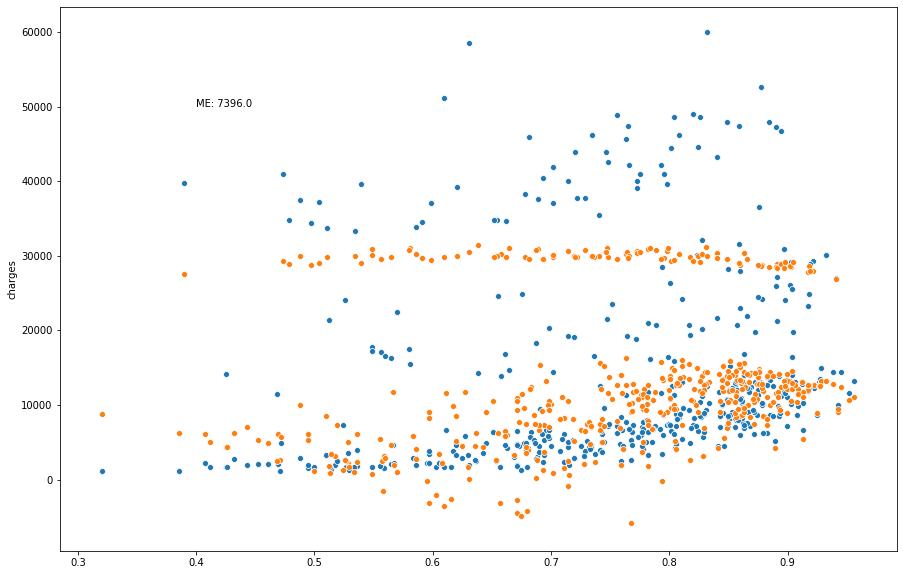

In [76]:
from sklearn.linear_model import LinearRegression

y_model = LinearRegression(fit_intercept=False).fit(X_train, y_train).predict(X_test)

LR_norm_me = np.sqrt(mean_squared_error(y_test, y_model))

fig = plt.figure(figsize=(15, 10))
sns.scatterplot(X_test[..., 0], y_test)
sns.scatterplot(X_test[..., 0], y_model)
plt.text(.4, 50000, 'ME: ' + str(round(LR_norm_me)))

*So far, this is the best performing model in therms of ME, however the model still struggles to predict those with higher charges. Below we can investigate what happens when we train a linear regression model on unnormalized data:*

### ***Linear Regression With Unnormalized Data***

Text(20, 50000, 'ME: 6109.0')

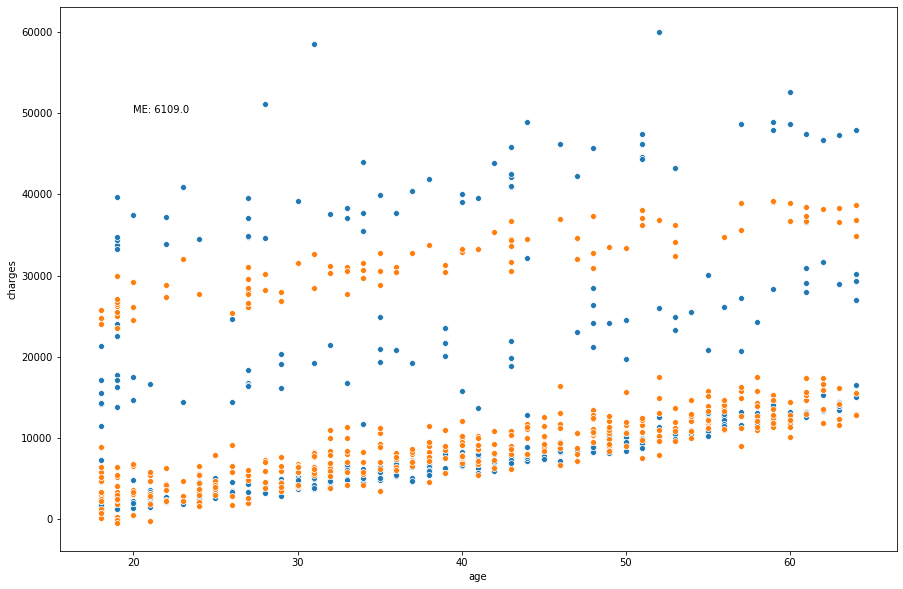

In [77]:
y_unnorm_model = LinearRegression(fit_intercept=False).fit(X_unnorm_train, y_unnorm_train).predict(X_unnorm_test)

x_ax = 'age'

LR_unnorm_me = np.sqrt(mean_squared_error(y_unnorm_test, y_unnorm_model))

fig = plt.figure(figsize=(15, 10))
sns.scatterplot(X_unnorm_test[x_ax], y_unnorm_test)
sns.scatterplot(X_unnorm_test[x_ax], y_unnorm_model)
plt.text(20, 50000, 'ME: ' + str(round(LR_unnorm_me)))

*Interestingly, this model is the best performing one thus far with an ME of 6109. Now, let's try a random forrest approach to see if this model can outperform the previous attempts.*



### ***Random Forest Regressor: Normalized Data***

*In the random forest model, we essentially utilize multiple decision trees in our 'forest' to predict our Y variable, however the features these trees use to make their prediction is randomized so that no single feature dominates the predictive power of the model.*

*There are two hyperparameters that we need to tune: `max_depth` or the cutoff point of the tree, and `n_estimators` which is the number of trees in the forest. To tune these hyperparameters we will use GridSearchCV with 5-fold cross validation as shown below:*

In [78]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=1000)
# Create dt instance 
rf = RandomForestRegressor()
# Create grid search instance 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 16), "n_estimators": range(2, 16)}, 
    cv=kf, 
    n_jobs=-1
)
gscv.fit(X_train, y_train)
# Get cross-validation data

cv_df = pd.DataFrame(gscv.cv_results_)
piv_df = cv_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)
piv_df.style.background_gradient("nipy_spectral", axis=None)

param_n_estimators,2,3,4,5,6,7,8,9,10,11,12,13,14,15
param_max_depth,,,,,,,,,,,,,,
1,0.602,0.602,0.602,0.603,0.602,0.602,0.602,0.602,0.603,0.603,0.602,0.603,0.602,0.602
2,0.704,0.704,0.714,0.721,0.716,0.715,0.716,0.712,0.722,0.716,0.716,0.72,0.718,0.723
3,0.744,0.765,0.753,0.768,0.758,0.763,0.774,0.767,0.777,0.774,0.767,0.773,0.764,0.763
4,0.775,0.777,0.791,0.783,0.789,0.79,0.783,0.79,0.79,0.789,0.796,0.793,0.791,0.799
5,0.754,0.781,0.783,0.792,0.793,0.8,0.809,0.806,0.805,0.807,0.808,0.809,0.804,0.805
6,0.745,0.773,0.791,0.801,0.795,0.796,0.801,0.8,0.807,0.806,0.806,0.805,0.804,0.81
7,0.723,0.769,0.784,0.789,0.799,0.787,0.8,0.795,0.799,0.804,0.803,0.801,0.798,0.806
8,0.7,0.765,0.781,0.782,0.789,0.784,0.794,0.803,0.795,0.795,0.802,0.8,0.798,0.798
9,0.717,0.767,0.781,0.769,0.785,0.785,0.782,0.802,0.801,0.798,0.795,0.795,0.806,0.8


*Here we can programatically extract the optimal `n_estimators` and `max_depth` from our hyperparameter tuning corresponding with the grid above:*

In [79]:
opt_n_est_norm = gscv.best_estimator_.n_estimators
opt_max_depth_norm = gscv.best_estimator_.max_depth

print("The optimal # of estimators was determined to be " + 
      str(opt_n_est_norm) + 
      " while the optimal max depth was " + 
      str(opt_max_depth_norm) + 
      ".")

The optimal # of estimators was determined to be 15 while the optimal max depth was 6.


*Now, using these parameters, we can model our data and assess the ME of the model as well as visualize our predictions:*

Text(0.4, 50000, 'ME: 4773.0')

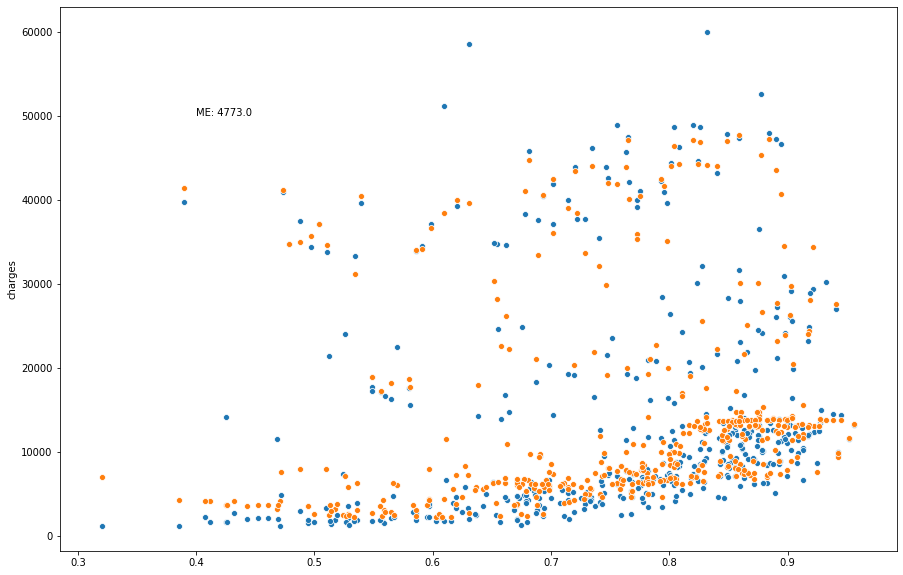

In [80]:
rf = RandomForestRegressor(max_depth = opt_max_depth_norm, n_estimators = opt_n_est_norm)

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

# Test/Visualize
RF_norm_me = np.sqrt(mean_squared_error(y_test, y_predicted))

fig = plt.figure(figsize=(15, 10))
sns.scatterplot(X_test[..., 0], y_test)
sns.scatterplot(X_test[..., 0], y_predicted)
plt.text(.4, 50000, 'ME: ' + str(round(RF_norm_me)))

*Here we have a new lowest ME, ande we can see that the model is able to begin to predict the `charges` variable as the number gets higher,a task previous models were unable to handle.*

*Finally, we can attempt to repeat this same workflow with random Forest modeling with the unnormalized data and compare models*



### ***Random Forest Regressor: Unnormalized Data***

In [81]:
kf = KFold(n_splits=5, shuffle=True, random_state=1000)
# Create dt instance 
rf = RandomForestRegressor()
# Create grid search instance 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 16), "n_estimators": range(2, 16)}, 
    cv=kf, 
    n_jobs=-1
)
gscv.fit(X_unnorm_train, y_unnorm_train)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
piv_df = cv_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)
piv_df.style.background_gradient("nipy_spectral", axis=None)

/home/shane/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


param_n_estimators,2,3,4,5,6,7,8,9,10,11,12,13,14,15
param_max_depth,,,,,,,,,,,,,,
1,0.6,0.6,0.603,0.601,0.603,0.603,0.603,0.602,0.602,0.603,0.603,0.603,0.601,0.602
2,0.807,0.813,0.811,0.813,0.813,0.812,0.811,0.813,0.812,0.813,0.813,0.814,0.813,0.813
3,0.832,0.836,0.835,0.836,0.838,0.837,0.836,0.838,0.838,0.837,0.839,0.837,0.839,0.836
4,0.819,0.832,0.833,0.83,0.834,0.833,0.83,0.835,0.838,0.835,0.835,0.833,0.837,0.835
5,0.806,0.82,0.825,0.824,0.821,0.824,0.829,0.831,0.831,0.831,0.832,0.83,0.832,0.829
6,0.792,0.797,0.81,0.815,0.818,0.813,0.817,0.825,0.814,0.823,0.822,0.823,0.822,0.829
7,0.742,0.79,0.806,0.797,0.82,0.814,0.812,0.809,0.814,0.817,0.815,0.816,0.823,0.817
8,0.762,0.779,0.793,0.797,0.791,0.792,0.802,0.803,0.815,0.805,0.804,0.81,0.815,0.804
9,0.735,0.77,0.775,0.782,0.795,0.798,0.799,0.793,0.795,0.809,0.806,0.803,0.811,0.803


In [82]:
opt_n_est_unnorm = gscv.best_estimator_.n_estimators
opt_max_depth_unnorm = gscv.best_estimator_.max_depth

print("The optimal # of estimators was determined to be " + 
      str(opt_n_est_unnorm) + 
      " while the optimal max depth was " + 
      str(opt_max_depth_unnorm) + 
      " for the unnormalized decision tree model.")

The optimal # of estimators was determined to be 14 while the optimal max depth was 3 for the unnormalized decision tree model.


*Using hyperparameters to build model:*

Text(20, 50000, 'ME: 4620.0')

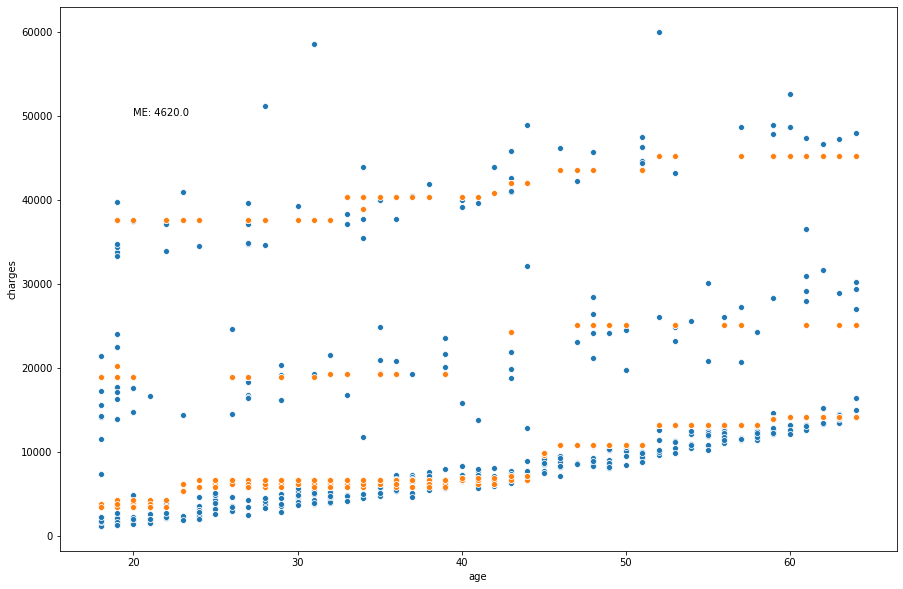

In [83]:
rf = RandomForestRegressor(max_depth = opt_max_depth_unnorm, n_estimators = opt_n_est_unnorm)

# Fit 
rf.fit(X_unnorm_train, y_unnorm_train)

# Predict
y_predicted_unnorm = rf.predict(X_unnorm_test)

# Test/Visualize
RF_unnorm_me = np.sqrt(mean_squared_error(y_unnorm_test, y_predicted_unnorm))

fig = plt.figure(figsize=(15, 10))
sns.scatterplot(X_unnorm_test[x_ax], y_unnorm_test)
sns.scatterplot(X_unnorm_test[x_ax], y_predicted_unnorm)
plt.text(20, 50000, 'ME: ' + str(round(RF_unnorm_me)))

*This model performs slightly better than the model using normalized data, however this iteration is clearly able to predict charges based on those two unidentified 'groups' we have been referring to.*

## ***Summary of Models***

*The table below summarizes the mean error of each model created:*

In [84]:
model_summary = pd.DataFrame({'Model' : ['KNN', 'KNN', 'Linear Regression', 'Linear Regression', 'Random Forest', 'Random Forest'], 
                              'Normalized' : ['Y', 'N', 'Y', 'N', 'Y', 'N'],
                             'Score' : [knn_norm_me, knn_unnorm_me, LR_norm_me, LR_unnorm_me, RF_norm_me, RF_unnorm_me]})
model_summary

,Model,Normalized,Score
0,KNN,Y,8554.030009
1,KNN,N,11085.879483
2,Linear Regression,Y,7396.245246
3,Linear Regression,N,6108.831746
4,Random Forest,Y,4772.874608
5,Random Forest,N,4620.455381


## **Clustering with unsupervised learning**

*We've found an interesting relationship between age and charges, which our models have struggled to handle. This may mean that there are groups within these data not listed in the variables given. To explore this, we will use unsupervised learning to determine the optimal number of clusters to see if there is any hidden structure in our data.*

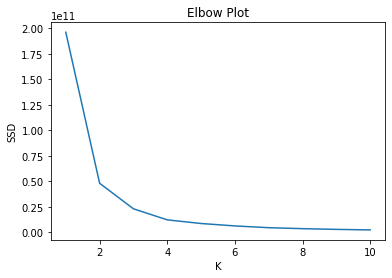

In [96]:
from sklearn.cluster import KMeans

insur_clustering = pd.get_dummies(insurance.copy())
insur_norm_clustering = normalize(insur_clustering)

def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(insur_norm_clustering, 10)

*The 'elbow' appears to occur when K = 2, so we will try clustering with this parameter can visualize the results to check it out.*

In [ ]:
cluster_data = insurance.copy()

# Instantiate
model = KMeans(
    n_clusters=2,
    random_state=1000,
)
# fit and predict
cluster_labels = model.fit_predict(pd.get_dummies(insurance))

#Make the cluster group its own column in the pandas df
cluster_data['group'] = cluster_labels
cluster_data['group'] = cluster_data['group'].replace([0, 1], ['g1', 'g2'])

#Re-make the pairplot, coloring by these clusters
sns.pairplot(cluster_data, hue = 'group', plot_kws= {'alpha' : .2})

*We don't see any convincing grouping here, so we can try with k = 3 below:*

In [ ]:
cluster_data = insurance.copy()

# Instantiate
model = KMeans(
    n_clusters=3,
    random_state=1000,
)
# fit and predict
cluster_labels = model.fit_predict(pd.get_dummies(cluster_data))

#Make the cluster group its own column in the pandas df
cluster_data['group'] = cluster_labels
cluster_data['group'] = cluster_data['group'].replace([0, 1, 2], ['g1', 'g2', 'g3'])

#Re-make the pairplot, coloring by these clusters
sns.pairplot(cluster_data, hue = 'group', plot_kws= {'alpha' : .2})

It has become clear that the groups are being defined simply based on splitting the `charges` variable into 3 groups, perhaps because the scale of this variable is so large. Moving forward, we should repeat this clustering with normalized variables.

# ***Conclusion***

*We were able to successfully predict the `charges` variable from the information given, however the clustering must be repeated using normalized data to be effective.*